# Week 10: Recommender Systems

# Objectives

This project's objective is to create a movie recommender system using Movielens database and build a web interface for it.

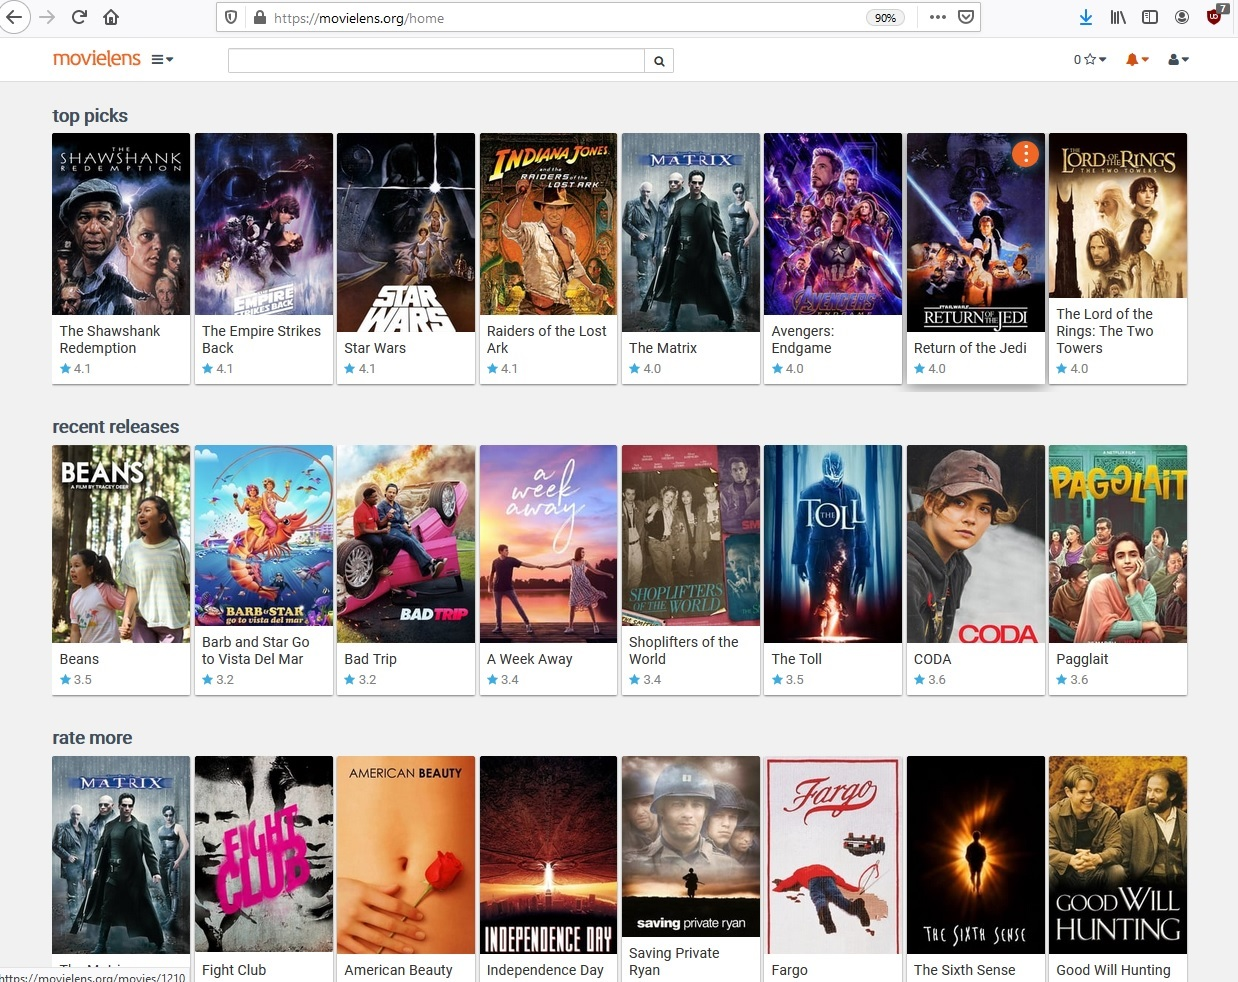


# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF

# Loading Data

In [2]:
movies = pd.read_csv('./data/movies.csv')
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.shape

(9742, 3)

In [4]:
ratings = pd.read_csv('./data/ratings.csv')
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings.shape

(100836, 4)

In [6]:
df = ratings.merge(movies, on = 'movieId', how = 'left')
df.head(5)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


# EDA

# Feature Engineering

In [7]:
user = df.pivot_table(index='userId',columns='title',values='rating')
user.head(20)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [8]:
user.fillna(user.mean(), inplace=True)
user.head(10)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,4.000000,1.0
2,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
3,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
4,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
5,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
6,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
7,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
8,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0
9,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,1.000000,2.0,3.134615,1.0


# Non-negative Matrix Factorization

## Add New User with Rating

In [9]:
new_user_dict = {'Jurassic Park (1993)': 4,
                'Mrs. Doubtfire (1993)': 4,
                'Silence of the Lambs, The (1991)': 4,
                '101 Dalmatians (1996)': 3,
                'Gladiator (2000)': 4, 
                'Ghostbusters (a.k.a. Ghost Busters) (1984)': 3,
                'Fargo (1996)': 2,
                'Minority Report (2002)': 4,
                '2 Fast 2 Furious (Fast and the Furious 2, The) (2003)': 2,
                'Alice in Wonderland (2010)': 4
                }

## Dictionary to DataFrame

In [10]:
rated_movies = list(user.columns)
empty_list = [np.nan]*len(rated_movies)
ratings_dict = dict(zip(rated_movies, empty_list))
print(ratings_dict)
for movie, rating in new_user_dict.items():
    ratings_dict[movie] = rating
ratings_dict

{"'71 (2014)": nan, "'Hellboy': The Seeds of Creation (2004)": nan, "'Round Midnight (1986)": nan, "'Salem's Lot (2004)": nan, "'Til There Was You (1997)": nan, "'Tis the Season for Love (2015)": nan, "'burbs, The (1989)": nan, "'night Mother (1986)": nan, '(500) Days of Summer (2009)': nan, '*batteries not included (1987)': nan, '...All the Marbles (1981)': nan, '...And Justice for All (1979)': nan, '00 Schneider - Jagd auf Nihil Baxter (1994)': nan, '1-900 (06) (1994)': nan, '10 (1979)': nan, '10 Cent Pistol (2015)': nan, '10 Cloverfield Lane (2016)': nan, '10 Items or Less (2006)': nan, '10 Things I Hate About You (1999)': nan, '10 Years (2011)': nan, '10,000 BC (2008)': nan, '100 Girls (2000)': nan, '100 Streets (2016)': nan, '101 Dalmatians (1996)': nan, '101 Dalmatians (One Hundred and One Dalmatians) (1961)': nan, "101 Dalmatians II: Patch's London Adventure (2003)": nan, '101 Reykjavik (101 Reykjavík) (2000)': nan, '102 Dalmatians (2000)': nan, '10th & Wolf (2006)': nan, '10th 

{"'71 (2014)": nan,
 "'Hellboy': The Seeds of Creation (2004)": nan,
 "'Round Midnight (1986)": nan,
 "'Salem's Lot (2004)": nan,
 "'Til There Was You (1997)": nan,
 "'Tis the Season for Love (2015)": nan,
 "'burbs, The (1989)": nan,
 "'night Mother (1986)": nan,
 '(500) Days of Summer (2009)': nan,
 '*batteries not included (1987)': nan,
 '...All the Marbles (1981)': nan,
 '...And Justice for All (1979)': nan,
 '00 Schneider - Jagd auf Nihil Baxter (1994)': nan,
 '1-900 (06) (1994)': nan,
 '10 (1979)': nan,
 '10 Cent Pistol (2015)': nan,
 '10 Cloverfield Lane (2016)': nan,
 '10 Items or Less (2006)': nan,
 '10 Things I Hate About You (1999)': nan,
 '10 Years (2011)': nan,
 '10,000 BC (2008)': nan,
 '100 Girls (2000)': nan,
 '100 Streets (2016)': nan,
 '101 Dalmatians (1996)': 3,
 '101 Dalmatians (One Hundred and One Dalmatians) (1961)': nan,
 "101 Dalmatians II: Patch's London Adventure (2003)": nan,
 '101 Reykjavik (101 Reykjavík) (2000)': nan,
 '102 Dalmatians (2000)': nan,
 '10th &

In [11]:
new_user_df = pd.DataFrame(list(ratings_dict.values()), index=rated_movies)
new_user_df = new_user_df.T
new_user_df

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Model

In [12]:
nmf = NMF(n_components=5,max_iter=200, init='random', random_state=10)
nmf.fit(user)

NMF(init='random', n_components=5, random_state=10)

In [13]:
Q = nmf.components_

In [14]:
[print(a, b) for (a, b) in zip(Q.T, rated_movies)]

[1.54895954 0.37767104 0.52860134 0.97703018 0.41823295] '71 (2014)
[0.2572215  1.38444776 0.76607741 1.00951869 1.35409897] 'Hellboy': The Seeds of Creation (2004)
[0.49510989 1.14323657 0.08769066 1.33234122 0.89983387] 'Round Midnight (1986)
[1.911623   0.54596117 0.79028134 1.14405673 0.41855455] 'Salem's Lot (2004)
[1.39642617 0.35115844 0.79404446 0.82527038 0.62328104] 'Til There Was You (1997)
[0.09497229 0.53282268 0.34209226 0.07536884 0.75345787] 'Tis the Season for Love (2015)
[0.07700202 1.15542848 0.88581528 0.37276519 1.40514204] 'burbs, The (1989)
[0.93040443 0.61058646 0.44280843 0.57513184 0.4614854 ] 'night Mother (1986)
[0.9825416  0.74178946 0.49866675 0.92542599 0.68207478] (500) Days of Summer (2009)
[0.71889881 1.06274368 0.53499937 0.62526478 0.53702195] *batteries not included (1987)
[0.44615162 0.09774605 0.69229036 0.35766522 0.64172994] ...All the Marbles (1981)
[1.14716775 0.25715238 0.44392919 0.89591624 0.38202329] ...And Justice for All (1979)
[1.688421

[1.32962909 0.31436417 0.42295723 0.29725924 0.83638445] Adventureland (2009)
[1.20724994 0.5900882  1.36482806 0.95471695 1.31350395] Adventures Of Sherlock Holmes And Dr. Watson: The Twentieth Century Approaches (1986)
[0.53851794 0.74243407 0.48485881 0.71667098 1.30827011] Adventures in Babysitting (1987)
[0.84224291 0.61031853 0.49468743 0.9503883  0.87070309] Adventures in Plymptoons! (2011)
[1.34751578 0.41572547 0.4009982  0.9344853  0.62494065] Adventures of Baron Munchausen, The (1988)
[0.53470571 0.89665167 0.60514329 0.95749805 1.04228008] Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984)
[0.2581144  0.45520813 0.14547398 0.30597147 0.50387344] Adventures of Elmo in Grouchland, The (1999)
[0.77665617 0.29704751 0.61916189 0.84490044 0.68737121] Adventures of Ford Fairlane, The (1990)
[0.70307829 0.3168683  0.2090918  0.73402622 0.67358734] Adventures of Huck Finn, The (1993)
[0.47375612 0.92607657 0.7819809  0.65070183 0.50268312] Adventures of Ichabod and 

[0.65768002 0.5174645  0.28444458 0.80486646 0.35028108] April Morning (1988)
[0.6657202  0.80128677 0.59031609 0.76494758 0.37450363] Apt Pupil (1998)
[0.94041618 0.21972343 0.98002267 0.49066291 0.45332696] Aqua Teen Hunger Force Colon Movie Film for Theaters (2007)
[0.19976303 0.50874602 0.02248435 1.10877242 0.52428652] Aquamarine (2006)
[0.34993628 1.05361325 0.55967644 0.53796992 0.67812616] Arachnophobia (1990)
[0.94147294 0.85434148 1.29840394 0.6016845  1.24726833] Ararat (2002)
[0.28492881 0.40342889 0.1087746  0.60139668 0.24638572] Are We Done Yet? (2007)
[0.14231291 0.05549554 0.03026418 0.         0.30830724] Are We There Yet? (2005)
[1.27286688 0.28446894 0.53154725 0.56331626 0.81762269] Are You Scared? (2006)
[1.63654605 0.37003346 0.60270535 0.7305494  0.41307923] Argo (2012)
[1.4632957  0.2583442  0.94858211 0.73246574 0.54366545] Ari Shaffir: Double Negative (2017)
[0.9322042  0.5562563  0.58929958 0.61343692 0.33004956] Ariel (1988)
[0.27613573 0.96813499 0.6382697

 4.08171315e-01] Belly (1998)
[0.62258755 1.30750501 1.19098554 1.19860315 0.77572604] Beloved (1998)
[1.20442673 0.46350126 0.4472394  0.51625909 0.86208617] Below (2002)
[0.71103976 0.34718052 1.31598422 0.7030495  0.84047939] Ben X (2007)
[1.1107007  0.69608184 0.98267521 0.65228553 0.63712994] Ben-Hur (1959)
[0.74431336 0.60381917 0.58908627 0.45170687 0.80458695] Ben-Hur: A Tale of the Christ (1925)
[9.39788240e-02 3.42226121e-02 1.53994616e-01 1.10881292e-06
 2.96607305e-01] Ben-hur (2016)
[0.45332151 0.65338981 0.67611262 0.67602636 0.665006  ] Benchwarmers, The (2006)
[0.90555674 0.32265973 0.06694774 0.72072401 1.54045177] Bend It Like Beckham (2002)
[0.65079747 0.12834389 1.19831022 0.35588681 0.73457803] Beneath the Planet of the Apes (1970)
[0.96868371 0.41609361 0.51143202 0.86280779 1.36014828] Benji (1974)
[1.54211147 0.53833021 0.96511963 0.54627795 0.8994888 ] Benji the Hunted (1987)
[0.93752984 0.45082143 0.51670897 0.9903248  0.78756313] Benny & Joon (1993)
[1.107997

[0.28134178 0.73778145 0.22073204 0.49380106 0.50785056] Brass Teapot, The (2012)
[1.47775861 0.25277542 0.61996318 0.59553884 0.62631935] Brassed Off (1996)
[1.34194918 0.33244192 0.55938429 0.67596784 0.42795861] Brave (2012)
[0.69276971 1.08998194 0.28896974 0.92997478 0.87733094] Brave Little Toaster, The (1987)
[0.12728665 0.06703412 0.81711914 0.25283979 0.58870041] Brave New World (1998)
[0.47156303 0.66528671 1.19826905 0.75016123 0.63239458] Brave One, The (2007)
[0.8248305  0.75730395 0.88761505 0.56543055 1.43256181] Braveheart (1995)
[0.6480618  1.39849727 0.62023046 1.13778893 0.84320439] Brazil (1985)
[0.02642776 1.59519834 0.17382022 1.79168241 0.74410013] Breach (2007)
[0.1524508  1.42193966 0.31419357 0.75901512 0.88203083] Bread and Chocolate (Pane e cioccolata) (1973)
[0.44335101 0.98810461 0.74011793 0.79959245 1.74700139] Bread and Roses (2000)
[1.24214125 0.14335795 1.10859028 0.34816208 0.89403062] Bread and Tulips (Pane e tulipani) (2000)
[0.12904394 0.41307777 

[0.60187628 0.33319112 0.55565824 0.09453955 0.80621503] Cherry 2000 (1987)
[0.26793714 0.36703866 0.42923546 0.91179827 1.03159316] Cherrybomb (2009)
[0.68761933 0.23492721 0.92261335 0.54912802 1.95731445] Chi-Raq (2015)
[1.36713605 0.30298365 0.22165114 0.7800211  1.02471803] Chicago (2002)
[0.10943987 0.87152534 0.25076243 0.60287448 0.91739022] Chicken Little (2005)
[0.68256373 0.47295565 0.78484386 0.74861275 1.32788186] Chicken Run (2000)
[0.25077356 1.21801752 0.36411181 0.61258173 0.65065589] Child's Play (1988)
[0.72386469 0.26707348 0.45880688 0.49742369 0.50581586] Child's Play 2 (1990)
[0.34061059 0.14675986 0.23894959 0.30990851 1.04596051] Child's Play 3 (1991)
[0.74045449 1.03905855 0.81115075 1.08290075 0.73045463] Child, The (L'enfant) (2005)
[1.2350915  0.36431582 0.53201991 0.53862131 0.81459411] Children Are Watching Us, The (Bambini ci guardano, I) (1944)
[1.53367051 0.29419506 0.51990844 0.80827197 0.39734406] Children of Dune (2003)
[1.30123669 0.15260112 1.2575

[0.65877661 0.18012337 0.54690026 0.62810595 0.68302706] Curse of the Jade Scorpion, The (2001)
[8.06202092e-05 1.96925895e-01 1.32539752e+00 4.81141812e-01
 8.02016476e-01] Cursed (2005)
[0.75620494 0.3865242  0.5161477  0.         1.61231203] Cutter's Way (1981)
[1.10526466 0.34365705 0.62588454 0.55803488 0.28443297] Cutthroat Island (1995)
[3.29574008e-04 1.42332358e+00 2.67159859e-01 8.55661077e-01
 8.37846459e-01] Cutting Edge, The (1992)
[0.14244531 0.05549737 0.03027612 0.         0.30803487] Cyborg (1989)
[0.18780359 1.774263   0.46316849 1.62345894 0.84248183] Cyrano de Bergerac (1990)
[0.06780706 1.18879084 0.56822162 0.40315564 0.75779945] Cyrus (2010)
[0.28253737 0.11232414 0.60817928 0.33727779 1.05269542] D.A.R.Y.L. (1985)
[0.47696851 0.85416938 0.48474762 0.67916081 0.64794259] D.E.B.S. (2004)
[0.64543179 0.59261656 0.26149091 0.10728107 1.0367789 ] D.O.A. (1950)
[0.24391568 1.20062931 0.91199118 1.10032071 0.67434951] D.O.A. (1988)
[0.88067322 0.19244963 0.53696251 0.3

[1.06414357 0.40390972 1.0093372  0.85721091 0.93688175] Doctor Who: The Runaway Bride (2007)
[1.5287401  0.38783077 1.19611552 0.84828042 0.55191343] Doctor Who: The Time of the Doctor (2013)
[0.74896253 0.22719568 0.78700332 1.59015373 1.24219263] Doctor Who: The Waters of Mars (2009)
[0.8584726  1.12066907 1.25026284 0.9233755  0.78180422] Doctor Who: Voyage Of The Damned (2007)
[1.55932751 0.54188512 0.66893209 0.73826635 0.48587557] Doctor Zhivago (1965)
[0.87948373 1.24662333 0.7230017  0.84797524 0.53721944] Doctor, The (1991)
[0.93749169 0.60536041 0.84531395 0.84191753 0.50050149] Dodgeball: A True Underdog Story (2004)
[0.73836038 1.0106922  0.88434853 0.92875243 0.76383006] Dog Day Afternoon (1975)
[0.16729769 0.87810597 0.64128997 1.23320559 0.69732214] Dog Days (Hundstage) (2001)
[0.17624223 0.38727281 0.679017   0.41854809 0.74682288] Dog Park (1998)
[0.80981762 1.3626984  1.09150936 0.94716586 0.94210681] Dog Soldiers (2002)
[0.66186163 0.85772225 1.42131281 0.59075164 1

[1.19338279 0.34862743 1.22814093 0.66515877 0.77674764] Exit Through the Gift Shop (2010)
[0.50692169 0.51324337 0.71753601 0.29785277 1.06138514] Exit Wounds (2001)
[0.43851549 0.58937084 0.48483732 0.74467675 0.65439567] Exit to Eden (1994)
[1.15712058 0.4281504  0.66746364 0.33062747 0.95814327] Exodus (1960)
[0.39966102 0.4924626  0.98527843 0.5923285  0.69926084] Exodus: Gods and Kings (2014)
[1.03891372 0.29992522 0.62925662 0.53690714 0.37251059] Exorcism of Emily Rose, The (2005)
[0.01736249 0.51947264 0.42515906 0.27499908 0.62211041] Exorcist II: The Heretic (1977)
[0.26117152 0.51069038 0.18930178 0.37756158 0.9929108 ] Exorcist III, The (1990)
[0.71803022 0.93374447 0.51163323 0.89206717 1.15836902] Exorcist, The (1973)
[0.10311059 0.84416239 0.62274768 0.74283547 0.71308576] Exorcist: The Beginning (2004)
[0.57431209 1.2808679  0.51768632 0.6880558  0.7869015 ] Exotica (1994)
[0.07535919 0.28443979 0.10799484 0.34290969 0.39011233] Expelled: No Intelligence Allowed (2008)

[1.03902565 0.56304143 0.38684418 1.33223526 0.60664388] Fresh (1994)
[1.44797445 0.3979802  0.60064345 0.96899399 0.51967366] Freshman, The (1925)
[0.13221856 1.33820859 0.5789929  0.87261233 0.62457017] Freshman, The (1990)
[1.08783081 0.74638429 0.51971937 0.41813217 1.14025149] Frida (2002)
[0.96947851 0.32366115 0.6084199  1.27438702 0.90515159] Friday (1995)
[0.17715163 0.69082926 0.91120461 0.61215021 0.4552925 ] Friday After Next (2002)
[0.69059516 0.46560271 0.45067475 1.03554218 1.39363428] Friday Night Lights (2004)
[0.21196267 0.33880517 1.21723517 0.85875843 0.90273982] Friday the 13th (1980)
[0.80918998 0.21488457 0.8723069  0.74495108 0.56246658] Friday the 13th (2009)
[9.09447104e-04 7.36991777e-01 6.35161337e-01 1.11281642e+00
 6.45814401e-01] Friday the 13th Part 2 (1981)
[0.00116564 0.99302059 0.44156059 0.50705093 0.77050342] Friday the 13th Part 3: 3D (1982)
[1.05012658 0.22397102 0.46157819 0.44404586 0.26664125] Friday the 13th Part IV: The Final Chapter (1984)
[

[0.88267221 0.65296307 0.42921559 1.03773719 0.71607437] Great Expectations (1946)
[0.25676164 1.23962088 0.10688964 1.32851251 0.97312597] Great Expectations (1998)
[0.00132059 0.84540528 1.04705434 0.83727799 1.04275527] Great Gatsby, The (1974)
[0.48888416 1.23501212 0.55540882 0.23216839 1.2785512 ] Great Gatsby, The (2013)
[1.10512452 0.16183787 1.15702868 0.75348491 0.51496929] Great Mouse Detective, The (1986)
[0.99929891 0.77251204 0.73335274 0.66044887 0.34513151] Great Muppet Caper, The (1981)
[0.70271774 0.23391639 0.45897787 0.95515665 0.82999289] Great Outdoors, The (1988)
[0.23841736 0.86534121 1.31680657 0.57197491 1.00507587] Great Race, The (1965)
[1.35193501 0.41015785 0.3819197  1.00799609 0.42561976] Great Santini, The (1979)
[0.85964524 0.8082573  0.66269084 0.54055755 1.52334361] Great Silence, The (Grande silenzio, Il) (1969)
[0.         1.26684142 0.52470262 0.37535862 0.86601063] Great White Hype, The (1996)
[0.84108684 0.21261297 0.74460191 0.45895171 0.597406

[1.0617839  0.32406748 0.17258218 0.37015158 1.16371737] Home for the Holidays (1995)
[0.28315384 1.1248592  0.46651029 0.97355435 0.61806047] Homefront (2013)
[0.25675391 0.10664757 0.0394814  0.05729643 0.63860359] Homegrown (1998)
[1.19993589 0.27314783 0.61262473 0.92913251 0.60022022] Homeward Bound II: Lost in San Francisco (1996)
[0.46995885 0.7088518  0.80537522 0.37244724 0.98669354] Homeward Bound: The Incredible Journey (1993)
[0.12353358 0.16152535 0.         0.61606243 0.28183873] Hommage à Zgougou (et salut à Sabine Mamou) (2002)
[1.15857863 0.44882154 0.92325642 0.80941449 0.49476358] Honest Liar, An (2014)
[0.74689015 0.74212381 0.37712679 0.53485365 0.76299365] Honey (2003)
[0.49126159 0.79456307 1.03642065 0.69828347 1.00150737] Honey (Miele) (2013)
[0.57234214 0.16638507 0.3610713  0.45114574 0.63504687] Honey, I Blew Up the Kid (1992)
[0.73740745 0.53018303 0.53044346 0.48929919 0.60159645] Honey, I Shrunk the Kids (1989)
[0.78723009 0.72557537 0.77165408 0.8603065 

[0.65191386 0.36065347 0.21673256 1.07581378 0.69340656] Innkeepers, The (2011)
[0.46210768 0.39962879 0.06180547 0.35472767 1.24906662] Innocent Man, An (1989)
[1.24333616 0.80245299 0.75515485 0.55117749 0.67492484] Inside (À l'intérieur) (2007)
[1.12846787 0.95431084 0.59748922 1.18115348 0.61192975] Inside Job (2010)
[0.92527452 0.78370743 0.33597109 1.0538721  0.74619344] Inside Llewyn Davis (2013)
[0.43897232 0.78362198 1.22775885 1.1399603  0.86002727] Inside Man (2006)
[0.3145489  0.72864555 1.01445249 0.8886191  1.68447117] Inside Out (2015)
[1.25244117 0.50301424 0.72260803 0.4970712  0.77612193] Insider, The (1999)
[0.68147313 0.26790748 0.8536026  0.38060601 0.68762163] Insidious (2010)
[0.00331041 1.00857535 0.44859671 1.51025016 0.76466759] Insidious: Chapter 2 (2013)
[0.54621202 0.41574403 0.26329581 0.84970817 0.67214555] Insidious: Chapter 3 (2015)
[0.8159525  0.50940978 0.96029717 0.63697278 0.88076648] Insidious: The Last Key (2018)
[0.23264934 1.70015591 0.32640843 

[0.79613609 0.48062841 0.845407   0.76676833 0.71326358] Kind Hearts and Coronets (1949)
[0.69048395 0.49224767 0.6670542  0.49091511 0.76476393] Kindergarten Cop (1990)
[0.35218305 0.14650814 0.11762603 0.13552421 0.92427034] Kindergarten Cop 2 (2016)
[0.21704668 0.09837638 0.00390468 0.30987244 0.49872053] Kindred, The (1986)
[0.98208633 0.56561452 0.49688369 0.5674814  0.31567583] King Arthur (2004)
[0.50259604 0.97338243 0.1940265  1.15836654 1.3637995 ] King Kong (1933)
[0.52995715 0.21600598 0.79256508 0.7443203  0.7968242 ] King Kong (1976)
[0.59890472 0.93515863 0.82410129 0.41618978 0.99990954] King Kong (2005)
[0.13446741 0.32676768 0.8949841  0.04612605 1.06533694] King Kong Lives (1986)
[0.17402138 1.10151013 0.25744273 0.4255889  0.97267277] King Kong vs. Godzilla (Kingukongu tai Gojira) (1962)
[0.42666388 0.16648283 0.09076775 0.         0.92548714] King Ralph (1991)
[0.35426773 0.93261742 0.46326278 0.61437152 0.41854406] King Solomon's Mines (1937)
[0.5388126  0.5014563

[0.         0.65875494 0.70844073 0.7774805  0.67772019] Little Monsters (1989)
[1.67617974 0.71261762 0.95014367 0.95935119 0.68612844] Little Murders (1971)
[0.52506417 0.50941055 0.3393344  0.52960853 0.84893619] Little Nemo: Adventures in Slumberland (1992)
[0.29849125 0.473283   0.11214314 1.07890811 1.00130918] Little Nicky (2000)
[0.86351041 0.36795863 0.55929541 0.7025933  0.64198613] Little Nikita (1988)
[0.56148635 1.58128408 0.70272794 0.83268867 0.63501433] Little Princess, A (1995)
[0.71789608 0.86212013 0.85543246 0.61851307 0.75308717] Little Princess, The (1939)
[0.07788435 0.88008942 0.77853564 0.59075839 0.92482819] Little Rascals, The (1994)
[0.69913584 0.76363006 0.84234421 0.29773884 1.03757533] Little Shop of Horrors (1986)
[1.17729852 0.28606592 0.31189111 0.52964403 0.58419968] Little Shop of Horrors, The (1960)
[0.75093496 0.7230998  0.48819285 0.58134679 0.61134893] Little Vampire, The (2000)
[1.39222585 0.60356955 0.73057462 0.8069925  0.29833084] Little Voic

[0.68745774 0.39113602 0.25197138 0.54330166 0.8499273 ] Masters of the Universe (1987)
[0.79510021 0.72501676 0.72238255 0.62010372 0.52616133] Matador, The (2005)
[1.45790076 0.75384866 1.10237626 1.0935426  0.75306756] Match Factory Girl, The (Tulitikkutehtaan tyttö) (1990)
[1.05729212 0.33950828 0.83330213 0.0344987  1.31795751] Match Point (2005)
[0.47020825 0.81810943 1.0842706  0.79923691 0.62546164] MatchMaker, The (1997)
[0.91838513 0.72262348 0.56546321 0.7277823  1.04146854] Matchstick Men (2003)
[0.27157538 0.10950786 0.93129241 0.41083715 0.65351988] Material Girls (2006)
[0.98914555 0.26720057 1.59545725 0.67274364 1.05169769] Matewan (1987)
[0.68465933 0.3234314  0.         1.96521089 0.69357825] Matilda (1996)
[0.49719702 0.91136688 0.153381   0.85022436 0.94037955] Matinee (1993)
[0.17979147 1.31544831 0.77032823 1.00825572 0.70051264] Matrix Reloaded, The (2003)
[1.02412244 0.42172996 0.52423358 0.63720493 0.57645115] Matrix Revolutions, The (2003)
[1.28737274 0.45000

[0.42733592 0.1664921  0.09082837 0.         0.9241046 ] Munchies (1987)
[1.27078474 0.30029503 1.01806361 0.47367812 0.79962631] Munich (2005)
[0.63417075 0.28183689 0.60864488 0.64699657 0.51491995] Munna bhai M.B.B.S. (2003)
[1.11867979 0.33575491 0.94038759 0.90111601 0.58377737] Muppet Christmas Carol, The (1992)
[2.83459204e-01 1.37758988e-01 1.24533642e-06 6.85446682e-01
 6.16542068e-01] Muppet Christmas: Letters to Santa, A (2008)
[1.20523846 0.36745001 0.77023969 0.73701896 0.52914117] Muppet Movie, The (1979)
[0.52187575 1.04976997 0.41549593 0.819927   0.91672319] Muppet Treasure Island (1996)
[1.09962473 0.40997394 0.31668639 0.81184636 0.50449519] Muppets From Space (1999)
[0.1693117  0.66456288 1.07458469 1.21157958 0.98253981] Muppets Most Wanted (2014)
[1.09083437 0.49225354 0.38346549 0.56704124 0.832052  ] Muppets Take Manhattan, The (1984)
[0.8153661  0.14132177 0.39765585 0.6698237  0.68262925] Muppets, The (2011)
[0.09345675 1.25783321 0.37003731 0.37132617 1.21003

[0.08254325 0.03631864 0.07967325 0.14394091 0.24444035] Old Dogs (2009)
[0.28771229 0.80939127 0.86335162 0.7108033  0.86247209] Old Lady and the Pigeons, The (La vieille dame et les pigeons) (1997)
[1.04097154 0.21436386 0.21475199 1.20550421 1.0218513 ] Old Man and the Sea, The (1958)
[1.22825154 0.48858413 0.67944681 1.00803758 0.70530564] Old Men: Robbers (1971)
[0.90398686 0.27534181 0.71171445 0.92657334 0.98814394] Old School (2003)
[0.56145794 0.6673361  0.6437809  1.23075144 0.8119926 ] Old Yeller (1957)
[0.17882057 1.45545973 0.52047529 0.71884235 0.60899628] Oldboy (2013)
[1.05254925 0.33671996 0.36349578 0.810281   0.53651408] Oliver & Company (1988)
[0.70864594 0.85658071 1.0814774  0.98914727 0.60436412] Oliver Twist (1948)
[0.33423979 1.06583712 0.48000871 1.08140689 1.15425584] Oliver Twist (2005)
[1.10587536 0.23759697 1.15483957 0.53510665 0.66145849] Oliver! (1968)
[1.0280484  0.18128521 0.51372795 0.59969142 0.54567561] Olympus Has Fallen (2013)
[0.06412242 0.91409

[4.41755492e-04 5.77274454e-01 9.91115116e-01 6.19555834e-01
 6.43587410e-01] Planes: Fire & Rescue (2014)
[0.59641958 0.42862062 0.89542313 0.51396568 0.92134988] Planet 51 (2009)
[0.69036    1.26681993 0.17965565 1.50170202 1.06910445] Planet Earth (2006)
[1.49208925 0.43080651 0.72374538 0.72884549 0.78789113] Planet Earth II (2016)
[0.81220971 0.83174889 0.9500297  0.56849    0.96668036] Planet Terror (2007)
[1.14374769 0.63366237 0.44776283 0.88505866 0.79240694] Planet of the Apes (1968)
[0.         1.1934453  0.76737765 0.83129653 0.55674272] Planet of the Apes (2001)
[0.17863026 0.76968182 0.03876175 0.90956823 0.42447099] Plastic (2014)
[0.65362047 0.88463498 0.94032614 0.887171   1.1418772 ] Platoon (1986)
[0.92092437 0.44780892 0.96014841 1.0211124  0.69551342] Play It Again, Sam (1972)
[1.15800964 0.72739011 0.59658128 0.30222174 0.85254058] Play Misty for Me (1971)
[7.29580484e-04 8.43189535e-01 1.40226970e+00 6.38205280e-01
 1.10444455e+00] Play Time (a.k.a. Playtime) (19

[3.37946958e-04 7.43292339e-01 2.32470800e-01 2.85062369e-01
 5.65707154e-01] Red Tails (2012)
[1.44503796 0.30942316 1.05626006 0.61991057 0.55299722] Red Violin, The (Violon rouge, Le) (1998)
[0.48031571 1.05305368 0.28681865 0.85037022 0.64904511] Redbelt (2008)
[0.24772971 0.75510557 0.30153112 0.52588013 0.43060267] Redemption (Hummingbird) (2013)
[1.16998558 0.88169644 0.86452579 1.233829   0.56878393] Redline (2009)
[0.47164615 1.13780415 0.48703125 0.9029498  0.63166264] Reds (1981)
[0.80218121 0.2833033  0.61706392 1.11734796 0.71486299] Reefer Madness (a.k.a. Tell Your Children) (1938)
[1.34319469 0.88443378 1.18042971 0.95419169 0.52811063] Reefer Madness: The Movie Musical (2005)
[1.1142749  0.25596885 0.43927775 0.86211172 0.83226501] Ref, The (1994)
[1.62326679 0.65302258 0.7107047  1.45784392 0.59737683] Reform School Girls (1986)
[0.98190887 0.68189019 0.60404302 0.89821454 0.58329173] Regarding Henry (1991)
[1.20660556 0.39544891 0.51386381 0.89477122 0.47495635] Regre

[1.05936396 0.37438415 0.95646735 0.83178596 0.50657883] Scent of a Woman (1992)
[1.58330301 0.21301718 0.68442297 0.69786087 0.99753824] Schindler's List (1993)
[1.48234535 0.26079588 0.53509863 0.32598395 0.68675544] Schizopolis (1996)
[0.2764432  0.11040612 0.05935279 0.         0.63451969] Schlussmacher (2013)
[4.87476594e-04 5.64247823e-01 9.22781142e-01 4.17760107e-01
 8.31120739e-01] School Daze (1988)
[0.         0.36039944 1.40014364 0.93020377 0.84366724] School Ties (1992)
[0.26473171 0.96838053 0.15841399 0.7107248  0.77255238] School for Scoundrels (2006)
[0.43993718 0.78829283 0.68347961 0.8577731  0.63199764] School of Flesh, The (École de la chair, L') (1998)
[0.74801046 0.8012507  0.2631155  1.32308956 0.53075899] School of Rock (2003)
[1.42464163 0.51998215 0.4864086  0.93071257 0.38447274] Science of Sleep, The (La science des rêves) (2006)
[0.74841854 0.60115066 0.36434933 0.84496547 0.42507728] Scooby-Doo (2002)
[8.91207859e-04 1.08725401e+00 6.01248163e-01 5.89887

[1.01021506 0.5147318  0.58123463 1.15858058 0.51538649] Snow White and the Seven Dwarfs (1937)
[0.17678875 1.50258456 0.72383422 1.24012888 0.93289474] Snowden (2016)
[1.68947707 0.33350993 1.33065019 0.80262979 0.90073966] Snowflake, the White Gorilla (2011)
[1.28363145 0.4897299  0.36940575 1.03751832 0.55382514] Snowman, The (1982)
[0.3832804  1.30035043 0.26547892 1.04123724 0.93393647] Snowpiercer (2013)
[0.758741   0.17149248 0.27724206 0.49176516 0.93260997] Snowtown (Snowtown Murders, The) (2011)
[0.83208156 0.72903346 0.58545518 0.54976755 0.81152969] So I Married an Axe Murderer (1993)
[0.61641715 0.53079022 0.29299384 0.91860659 0.74329298] Soapdish (1991)
[0.73892776 0.12135739 1.87865264 0.62763893 1.08115271] Social Network, The (2010)
[0.9000431  0.56013905 1.20130748 0.722323   0.99235864] Soft Fruit (1999)
[3.72475648e-04 9.93128341e-01 1.79911693e-01 7.11034982e-01
 5.43096667e-01] Solace (2015)
[0.54450725 0.6749134  0.13239627 1.39979886 0.69797418] Solaris (2002)


[0.22121561 0.09748221 0.02491716 0.23927459 0.54349871] Surf Nazis Must Die (1987)
[0.38697531 1.10562292 0.80243529 0.81371126 0.93677748] Surf's Up (2007)
[1.24998232 0.46842577 0.51004575 0.29067137 0.93726656] Suriyothai (a.k.a. Legend of Suriyothai, The) (2001)
[0.21530769 0.67441472 0.84778591 0.64368399 1.31224558] Surrogates (2009)
[0.70363943 0.811552   0.70024299 0.24905609 1.40056358] Survive Style 5+ (2004)
[0.12021579 0.53649784 0.64367479 1.17422995 0.94017934] Surviving Christmas (2004)
[1.15587641 0.29498462 0.73469005 0.35054594 0.69350158] Surviving the Game (1994)
[0.14130733 0.05548166 0.03017347 0.         0.31037593] Survivor (2015)
[1.07594934 0.39181675 0.71104567 0.22497316 1.22661922] Suspect Zero (2004)
[1.53416104 0.4383807  0.57135771 0.69485793 0.62060719] Suspicion (1941)
[1.07298046 0.85921352 0.79535659 0.65806892 0.69184276] Suspiria (1977)
[0.32347914 0.517582   1.12681507 0.44376343 1.16367364] Suture (1993)
[0.73997766 0.64202351 0.13339359 1.10297

[0.98351683 1.01350952 0.69666367 0.64356683 0.53192936] The Overnight (2015)
[1.38563279 0.90305067 0.4266622  1.25207335 0.91719536] The Pacific (2010)
[3.43654139e-04 5.21167676e-01 4.23200214e-01 3.93985441e-01
 5.29918476e-01] The Perfect Guy (2015)
[1.00294362 0.32827545 0.1070619  1.03904144 0.55293499] The Plague of the Zombies (1966)
[1.2916197  0.44237263 0.45869811 0.64447093 0.57245317] The Players Club (1998)
[1.05717453 1.08861011 0.92798504 0.86262748 0.50236069] The Post (2017)
[0.70641711 0.18942214 0.55953383 0.78188744 0.40325505] The Prime Gig (2000)
[0.09607991 1.159105   0.01338537 1.51782977 0.8513003 ] The Professional: Golgo 13 (1983)
[0.10245991 0.03978814 0.11100747 0.00064348 0.31847281] The Pumaman (1980)
[0.42673494 0.55145266 0.43197681 0.86617129 0.53280346] The Punisher: Dirty Laundry (2012)
[0.66003209 0.11794253 0.78761177 0.71229878 0.75704366] The Purge: Election Year (2016)
[0.86659517 0.4765168  0.53407216 1.19113081 0.69858244] The Purple Sea (20

[0.74804608 1.39161731 0.99184864 1.20582441 1.31875792] True Stories (1986)
[1.19989283 0.40829037 0.55288844 0.54865978 0.44992429] True Story (2015)
[1.09662378 0.4458596  0.68375075 0.9446691  0.61893015] Truly, Madly, Deeply (1991)
[0.57896435 1.56168445 0.59383115 0.793229   0.6563352 ] Truman Show, The (1998)
[1.38210768 0.23803929 0.38550053 1.32169111 0.71147932] Trumbo (2015)
[1.50166096 0.17377534 1.34127613 0.71491861 0.63293539] Trust (1990)
[0.68173429 0.74271166 0.62336038 0.44099087 0.72342313] Truth (2015)
[0.68666823 0.57810567 0.94334782 0.72095257 0.82017397] Truth About Cats & Dogs, The (1996)
[7.89379218e-04 6.68530534e-01 7.90482414e-01 8.52919686e-01
 8.40236259e-01] Truth About Charlie, The (2002)
[0.66603521 0.80695761 0.53330158 0.71753805 0.82159227] Tsotsi (2005)
[0.03922684 0.76622414 1.53938359 0.72374691 1.00545531] Tuck Everlasting (2002)
[0.86951195 0.75466282 0.54274574 1.4679271  0.61079641] Tucker & Dale vs Evil (2010)
[0.77743132 0.65091754 0.41936

[0.54855839 0.37568594 0.44527458 0.34495579 0.36652132] Welcome to the Jungle (2013)
[0.52541831 1.43488152 0.81930679 1.49371827 0.89017692] Welcome to the Sticks (Bienvenue chez les Ch'tis) (2008)
[0.1537132  0.9701306  0.58059963 0.37485559 0.8865959 ] Wendigo (2001)
[0.61706026 1.14409107 0.31890699 0.67970687 1.10042419] Were the World Mine (2008)
[0.87120974 0.22211016 0.3729302  0.91956022 0.67056825] Wes Craven's New Nightmare (Nightmare on Elm Street Part 7: Freddy's Finale, A) (1994)
[0.78264748 0.35656163 1.46449298 0.99613606 0.90976104] West Beirut (West Beyrouth) (1998)
[0.80984264 0.55096189 0.79988606 0.88648102 0.89089872] West Side Story (1961)
[0.77419664 0.82159108 0.58800892 0.67467689 0.80867855] Westworld (1973)
[1.09529378 0.75729582 0.51306928 0.95131333 0.36742951] Wet Hot American Summer (2001)
[0.88885244 0.49164839 0.52386056 1.09615852 1.09116819] Whale Rider (2002)
[0.71949315 0.74767584 0.79724261 0.68342295 0.57575661] What About Bob? (1991)
[0.9501998

[0.54099474 0.90400809 0.41914274 0.79518652 0.63745089] anohana: The Flower We Saw That Day - The Movie (2013)
[0.80741691 0.93939243 0.89873891 0.88956833 0.6495839 ] eXistenZ (1999)
[0.         0.85821138 0.82249802 0.97310742 0.81177768] xXx (2002)
[4.85881452e-01 4.50883315e-01 2.10743031e-01 4.50132749e-04
 1.00643020e+00] xXx: State of the Union (2005)
[1.27276122 0.21459309 0.33631142 0.60293165 0.57221734] ¡Three Amigos! (1986)
[0.09928935 0.05194538 0.19227524 0.54367053 0.33865639] À nous la liberté (Freedom for Us) (1931)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

## Fill Missing Values and Transpose

In [15]:
new_user_df_filled = new_user_df.fillna(user.mean())
new_user_df_filled

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,4.0,4.0,3.5,5.0,4.0,1.5,3.176471,3.0,3.666667,3.285714,...,1.5,4.0625,3.666667,3.0,3.0,3.863636,2.770833,2.0,3.134615,1.0


## P Matrix

In [16]:
P = nmf.transform(new_user_df_filled)

## Prediction

In [17]:
predictions = np.dot(P, Q)

In [18]:
predictions.shape

(1, 9719)

In [19]:
recommendations = pd.DataFrame(predictions, columns=user.columns)
recommendations  

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
0,4.000329,3.999311,3.499616,5.000604,4.000128,1.499337,3.175821,3.000055,3.666891,3.285876,...,1.499721,4.062084,3.666887,2.999005,2.999911,3.864059,2.77088,1.998946,3.134628,0.999892


In [20]:
new_user_df.dtypes

'71 (2014)                                   float64
'Hellboy': The Seeds of Creation (2004)      float64
'Round Midnight (1986)                       float64
'Salem's Lot (2004)                          float64
'Til There Was You (1997)                    float64
                                              ...   
eXistenZ (1999)                              float64
xXx (2002)                                   float64
xXx: State of the Union (2005)               float64
¡Three Amigos! (1986)                        float64
À nous la liberté (Freedom for Us) (1931)    float64
Length: 9719, dtype: object

## Remove already rated items

In [21]:
not_rated_mask = np.isnan(new_user_df.values[0])
not_rated = recommendations.columns[not_rated_mask]
items_to_recommend = recommendations[not_rated]
items_to_recommend = items_to_recommend.T
items_to_recommend.columns = ['predicted_rating']

## Pick top 3 movies to recommend

In [22]:
items_to_recommend.sort_values(by='predicted_rating', ascending=False)[:10].index.tolist()

['Vampire in Venice (Nosferatu a Venezia) (Nosferatu in Venice) (1986)',
 'Human Condition III, The (Ningen no joken III) (1961)',
 'Sorority House Massacre (1986)',
 'Larry David: Curb Your Enthusiasm (1999)',
 'Colourful (Karafuru) (2010)',
 'Woman Is a Woman, A (femme est une femme, Une) (1961)',
 'Black Tar Heroin: The Dark End of the Street (2000)',
 'Decalogue, The (Dekalog) (1989)',
 "Mickey's Once Upon a Christmas (1999)",
 'Red Sorghum (Hong gao liang) (1987)']

# Collaborative Filtering

## Functions

In [23]:
def cs_table(df_imputed):
    data = []
    for user1 in df_imputed.columns:
        row = []
        for user2 in df_imputed.columns:
            cs = cosim(df_imputed[user1],df_imputed[user2])
            row.append(cs)
            #print(user1,user2,cs)

        data.append(row)
    return pd.DataFrame(data,index=df_imputed.columns,columns=df_imputed.columns).round(2)


In [24]:
def cosim(vec1,vec2):
    num = np.dot(vec1,vec2)
    den = np.sqrt(np.dot(vec1,vec1))*np.sqrt(np.dot(vec2,vec2))
    return num/den

## User Dataframe

In [25]:
user = df.pivot_table(index='userId',columns='title',values='rating').T
user_imputed = user.fillna(value=0)
user_imputed

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,2.0
xXx: State of the Union (2005),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5


## Choose User

In [26]:
active_user = 3

## Unseen Movies

In [27]:
unseen_mask = user[active_user].isna()

In [28]:
unseen_movies = user[unseen_mask].index

In [29]:
unseen_movies

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Salem's Lot (2004)',
       ''Til There Was You (1997)', ''Tis the Season for Love (2015)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       ...
       'Zulu (2013)', '[REC] (2007)', '[REC]² (2009)',
       '[REC]³ 3 Génesis (2012)',
       'anohana: The Flower We Saw That Day - The Movie (2013)',
       'eXistenZ (1999)', 'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)', 'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=9680)

## List of Similar Users

In [30]:
table = cs_table(user_imputed)
table

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.00,0.03,0.06,0.19,0.13,0.13,0.16,0.14,0.06,0.02,...,0.08,0.16,0.22,0.07,0.15,0.16,0.27,0.29,0.09,0.15
2,0.03,1.00,0.00,0.00,0.02,0.03,0.03,0.03,0.00,0.07,...,0.20,0.02,0.01,0.00,0.00,0.03,0.01,0.05,0.03,0.10
3,0.06,0.00,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,...,0.01,0.00,0.02,0.00,0.01,0.01,0.02,0.02,0.00,0.03
4,0.19,0.00,0.00,1.00,0.13,0.09,0.12,0.06,0.01,0.03,...,0.09,0.13,0.31,0.05,0.08,0.20,0.13,0.15,0.03,0.11
5,0.13,0.02,0.01,0.13,1.00,0.30,0.11,0.43,0.00,0.03,...,0.07,0.42,0.11,0.26,0.15,0.11,0.15,0.14,0.26,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.16,0.03,0.01,0.20,0.11,0.10,0.20,0.10,0.08,0.09,...,0.18,0.12,0.30,0.07,0.15,1.00,0.15,0.26,0.07,0.20
607,0.27,0.01,0.02,0.13,0.15,0.16,0.19,0.19,0.01,0.01,...,0.09,0.20,0.20,0.14,0.12,0.15,1.00,0.28,0.15,0.14
608,0.29,0.05,0.02,0.15,0.14,0.18,0.32,0.19,0.10,0.08,...,0.16,0.20,0.23,0.16,0.18,0.26,0.28,1.00,0.12,0.32


In [31]:
top5_user = table[active_user].sort_values(ascending=False).index[1:6]
top5_user

Int64Index([313, 312, 377, 527, 532], dtype='int64', name='userId')

## Predict Ratings

In [32]:
pred_ratings_list = []
for movie in unseen_movies:
    others_user = user.columns[~user.loc[movie].isna()]
    others_user = set(others_user)
    num = 0
    den = 0
    
    for userr in set(top5_user).intersection(others_user):
        ratings = user[userr][movie]    
        sim = table[active_user][userr]
        
        num = num + (ratings*sim)
        den = den + sim
    
    if (den> 0):
        pred_ratings = num/den
        pred_ratings_list.append((movie,pred_ratings))
    
sorted(pred_ratings_list, key=lambda tup: tup[1],reverse=True) 

[('12 Angry Men (1957)', 5.0),
 ('20 Million Miles to Earth (1957)', 5.0),
 ('5,000 Fingers of Dr. T, The (1953)', 5.0),
 ('7 Faces of Dr. Lao (1964)', 5.0),
 ('Abominable Dr. Phibes, The (1971)', 5.0),
 ('Aguirre: The Wrath of God (Aguirre, der Zorn Gottes) (1972)', 5.0),
 ('Aladdin (1992)', 5.0),
 ('Alexander Nevsky (Aleksandr Nevskiy) (1938)', 5.0),
 ("All the President's Men (1976)", 5.0),
 ('American Friend, The (Amerikanische Freund, Der) (1977)', 5.0),
 ('American Graffiti (1973)', 5.0),
 ('And Your Mother Too (Y tu mamá también) (2001)', 5.0),
 ('Andalusian Dog, An (Chien andalou, Un) (1929)', 5.0),
 ('Andromeda Strain, The (1971)', 5.0),
 ('Apollo 13 (1995)', 5.0),
 ('Army of Darkness (1993)', 5.0),
 ('Atomic Cafe, The (1982)', 5.0),
 ('Avengers, The (2012)', 5.0),
 ('Batman (1989)', 5.0),
 ('Battleship Potemkin (1925)', 5.0),
 ('Beastmaster, The (1982)', 5.0),
 ('Beauty and the Beast (1991)', 5.0),
 ('Beneath the Planet of the Apes (1970)', 5.0),
 ('Benji (1974)', 5.0),
 ('Bi